In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

The following lines need to be used if data the from downloaded dataset should be used. The location of the ``Data`` folder needs to be specified by the parameter ``DATA_FOLDER_PATH`` in the file ``input_params.json``. 

If you want to analyse your own dataset you need to set the variable ``file_path`` to the folder where the simulation is located. Importantly, in this folder there should only be located exactly one simulation.

In [2]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S3_homogeneous/Simulations'
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

parameter_path = os.path.join(file_path, 'parameter_set.csv')

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations/parameter_set.csv


In [3]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [4]:
v_init_exp = 0.28
std_exp = 0.05

In [5]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)
data_frame.simu_name

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations/ns_300_total_conc_1000',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations/ns_400_total_conc_1000',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations/ns_350_total_conc_1000',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations/variances_models.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S3_homogeneous/Simulations/Fig_3C_poster.pdf']


0     ns_300_total_conc_1000
1     ns_300_total_conc_1000
2     ns_300_total_conc_1000
3     ns_300_total_conc_1000
4     ns_300_total_conc_1000
5     ns_300_total_conc_1000
6     ns_300_total_conc_1000
7     ns_300_total_conc_1000
8     ns_300_total_conc_1000
9     ns_300_total_conc_1000
10    ns_400_total_conc_1000
11    ns_400_total_conc_1000
12    ns_400_total_conc_1000
13    ns_400_total_conc_1000
14    ns_400_total_conc_1000
15    ns_400_total_conc_1000
16    ns_400_total_conc_1000
17    ns_400_total_conc_1000
18    ns_400_total_conc_1000
19    ns_400_total_conc_1000
20    ns_350_total_conc_1000
21    ns_350_total_conc_1000
22    ns_350_total_conc_1000
23    ns_350_total_conc_1000
24    ns_350_total_conc_1000
25    ns_350_total_conc_1000
26    ns_350_total_conc_1000
27    ns_350_total_conc_1000
28    ns_350_total_conc_1000
29    ns_350_total_conc_1000
Name: simu_name, dtype: object

# Calculate CV

In [6]:
for simu_name in data_frame.simu_name.unique():
    simu_df = data_frame[data_frame["simu_name"] == simu_name]
    print(simu_name)
    data_frame.loc[data_frame['simu_name'] == simu_name, 'mean_v_init_per_n_ori'] = np.mean(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'stdd_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'cv_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])/np.mean(simu_df["v_init_per_n_ori"])

ns_300_total_conc_1000
ns_400_total_conc_1000
ns_350_total_conc_1000


# Calculate variance at different growth rates

In [7]:
def return_array_of_initiation_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init']

def calculate_CV_v_init(row):
    v_init_per_ori, t_init = return_array_of_initiation_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    return np.std(v_init_np[10:])/np.mean(v_init_np[10:])

In [8]:
data_frame["CV_v_init"] = data_frame.apply(lambda row: calculate_CV_v_init(row), axis=1)
data_frame.CV_v_init

0     0.000099
1     0.246048
2     0.236253
3     0.000207
4     0.339137
5     0.318109
6     0.258360
7     0.223397
8     0.000194
9     0.000164
10    0.000102
11    0.246048
12    0.236273
13    0.000244
14    0.338240
15    0.317994
16    0.258315
17    0.223551
18    0.000187
19    0.000168
20    0.000099
21    0.245996
22    0.236266
23    0.000207
24    0.338344
25    0.318109
26    0.258315
27    0.223443
28    0.000194
29    0.000142
Name: CV_v_init, dtype: float64

# Make Legends

In [9]:
def make_legend(n_c_max_0, diss_constant_sites):
    return r'$n_{{\rm s}}={}, K_{{\rm D}}^{{s}}={} \, \mu$m$^{{-3}}$'.format(int(n_c_max_0), int(diss_constant_sites))

data_frame.loc[:, 'legend_ns_sites'] = data_frame.apply(lambda row: make_legend(row.n_c_max_0, row.diss_constant_sites), axis = 1)

# Determine minimal activator fraction

In [10]:
def determine_min_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.min(fractions[int(fractions.size/2):])

def determine_max_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.max(fractions[int(fractions.size/2):])

data_frame.loc[:, 'min_frac'] = data_frame.apply(lambda row: determine_min_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame.loc[:, 'max_frac'] = data_frame.apply(lambda row: determine_max_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame['amplitude_frac'] = data_frame['max_frac']-data_frame['min_frac']
data_frame['relative_change_frac']= data_frame['min_frac']/data_frame['max_frac']

# Plot amplitude time varying

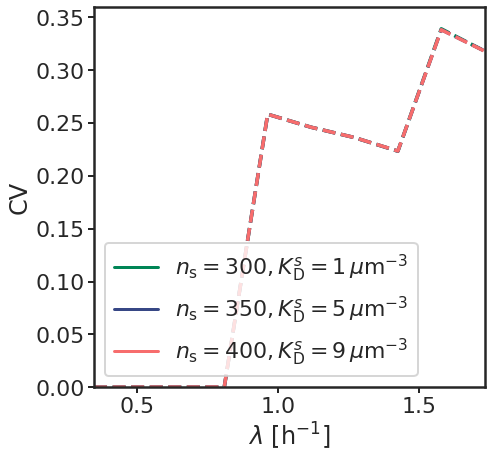

In [12]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='CV_v_init',
    data=data_frame.sort_values(by=["n_c_max_0"]),
    hue='legend_ns_sites',
#     dashes=[(4, 1), (4, 1), (4, 1), (4, 1)],
    markers=True,
    palette= [green, blue, pinkish_red],
    linewidth = 3.5,
    ax=ax
);
ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")
# ax.lines[3].set_linestyle("--")
ax.margins(0)
ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'CV')
# plt.legend(labels=legend
ax.set(ylim=(0,0.36))
# ax.vlines(x=(np.log(2)/data_frame["t_C"][0]), ymin=0, ymax=0.36)
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/variances_models.pdf', format='pdf', bbox_inches='tight')